In [46]:
#Importing Libraries & Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_data = pd.read_csv("amazon_products_sales_data_cleaned.csv")
amazon_data.head(5)

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [3]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        42675 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      42675 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product_category   

In [4]:
amazon_data.describe()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,discount_percentage
count,42675.000000,41651.000000,32164.000000,42675.000000,40613.000000,42675.000000
mean,4.399431,3087.106000,1293.665278,245.206204,257.611107,6.490492
std,0.382326,13030.460133,6318.323574,463.300850,496.633495,12.444501
min,1.000000,1.000000,50.000000,2.160000,2.160000,0.000000
25%,4.200000,82.000000,100.000000,29.990000,32.990000,0.000000
50%,4.500000,343.000000,200.000000,91.990000,89.000000,0.000000
75%,4.600000,1886.000000,400.000000,238.000000,229.990000,7.561803
max,5.000000,865598.000000,100000.000000,5449.000000,5449.000000,85.420000


In [5]:
amazon_data.isnull().sum()

product_title               0
product_rating              0
total_reviews            1024
purchased_last_month    10511
discounted_price            0
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage         0
dtype: int64

In [6]:
amazon_data.shape

(42675, 17)

In [7]:
amazon_data.duplicated().value_counts()

False    42675
Name: count, dtype: int64

In [8]:
rating = amazon_data["product_rating"].mean()
amazon_data["product_rating"] = amazon_data["product_rating"].fillna(rating)

In [9]:
amazon_data["total_reviews"]=amazon_data["total_reviews"].fillna(amazon_data["total_reviews"].mean())

FOR THE 'purchased_last_month' WE CONCIDER THE NULL VALUES FROM THE LAST MONTH VALUE

In [10]:
amazon_data["purchased_last_month"]=amazon_data["purchased_last_month"].ffill(axis=0)

FILLING THE NULL VALUES OF MISSING ORIGINAL PRODUCT PRICE

In [11]:
missing_original_price= amazon_data[amazon_data["original_price"].isnull()]["product_category"].value_counts()
pd.DataFrame(missing_original_price)

,count
product_category,
Phones,697
Laptops,696
Gaming,222
Other Electronics,143
Cameras,114
Power & Batteries,102
TV & Display,23
Networking,20
Wearables,18


In [12]:
avg_price = amazon_data.groupby("product_category")["original_price"].mean()
amazon_data["original_price"]= amazon_data["original_price"].fillna(amazon_data["product_category"].map(avg_price))

In [13]:
avg_discounted_price= amazon_data.groupby("product_category")["discounted_price"].mean()
amazon_data["discounted_price"] = amazon_data["discounted_price"] = amazon_data["discounted_price"].fillna(amazon_data["product_category"].map(avg_discounted_price))

FILL THE ORDER TYPE

In [14]:
buy_box = amazon_data["buy_box_availability"].mode()[0]
buy_box

'Add to cart'

In [15]:
amazon_data["buy_box_availability"]=amazon_data["buy_box_availability"].fillna(buy_box)

FIND THE MOST DELIVERED DATE

In [16]:
amazon_data["delivery_date"]=amazon_data["delivery_date"].fillna(amazon_data["delivery_date"].mode()[0])

MOST OF THE "sustainability_tags" HAS NULL VALUES

In [17]:
amazon_data["sustainability_tags"].value_counts()

sustainability_tags
Small Business                    1341
Carbon impact                      769
Works with Alexa                   425
Energy efficiency                  262
Alexa Built-in                     184
Manufacturing practices            148
Energy efficiency +3 more          121
Energy efficiency +1 more           93
Forestry practices                  18
Safer chemicals +2 more             18
Recycled materials                   7
Recycled materials +2 more           7
Safer chemicals +1 more              6
Recycled materials +3 more           4
Made in Italy                        4
1 sustainability certification       1
Name: count, dtype: int64

In [18]:
amazon_data.drop("sustainability_tags", axis = 1, inplace = True)

In [19]:
product_url = amazon_data["product_page_url"].mode()[0]

In [20]:
amazon_data["product_page_url"]=amazon_data["product_page_url"].fillna(product_url)

In [21]:
amazon_data.isnull().sum()

product_title           0
product_rating          0
total_reviews           0
purchased_last_month    0
discounted_price        0
original_price          0
is_best_seller          0
is_sponsored            0
has_coupon              0
buy_box_availability    0
delivery_date           0
product_image_url       0
product_page_url        0
data_collected_at       0
product_category        0
discount_percentage     0
dtype: int64

NOW THE DATA IS CLEAN AND READY --------->

ANALYSIS THE PRODUCT CATEGORY WHICH ARE SOLD THE MOST

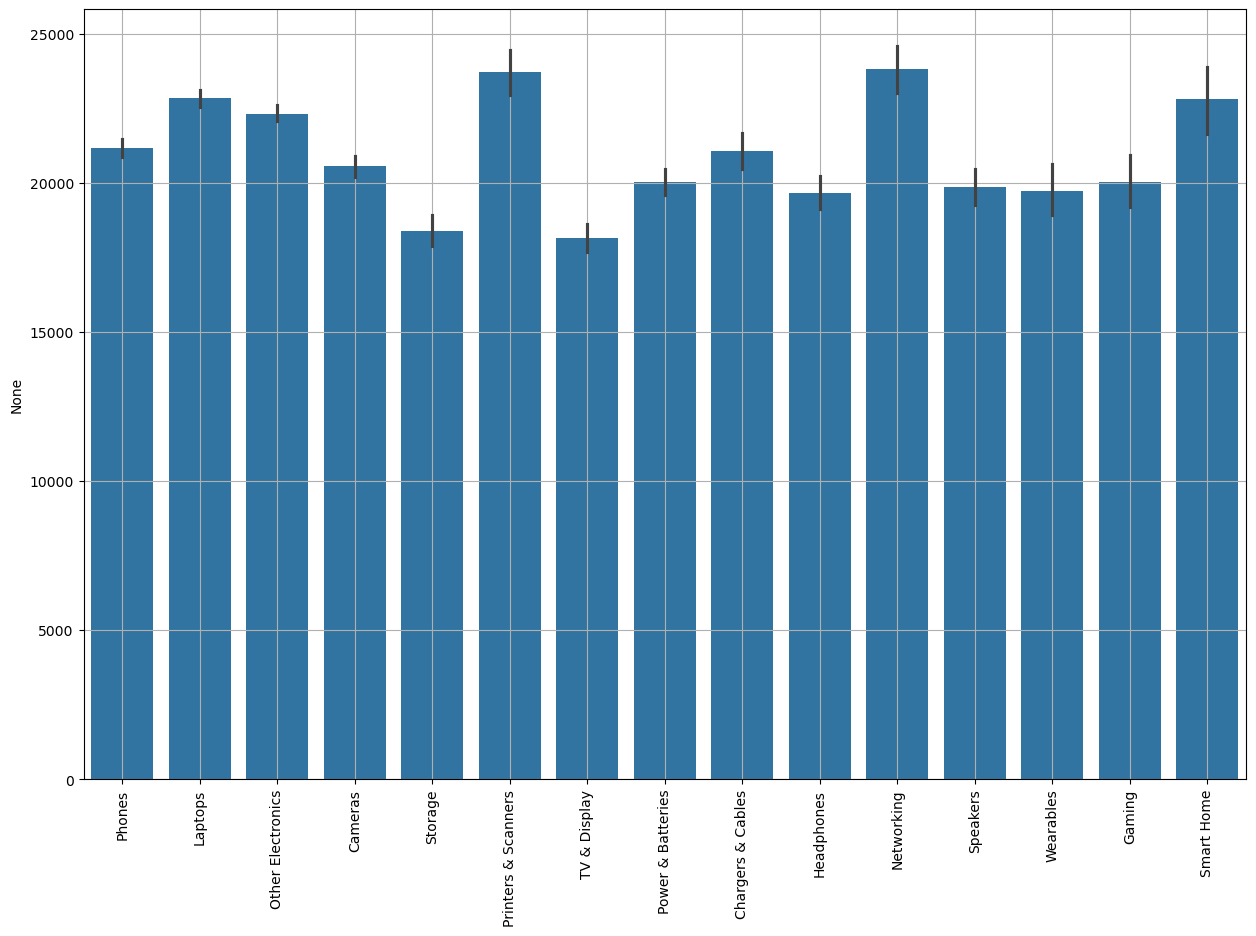

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x= amazon_data["product_category"].values ,y = amazon_data["product_category"].index)
plt.xticks(rotation =90)
plt.grid()
plt.show()

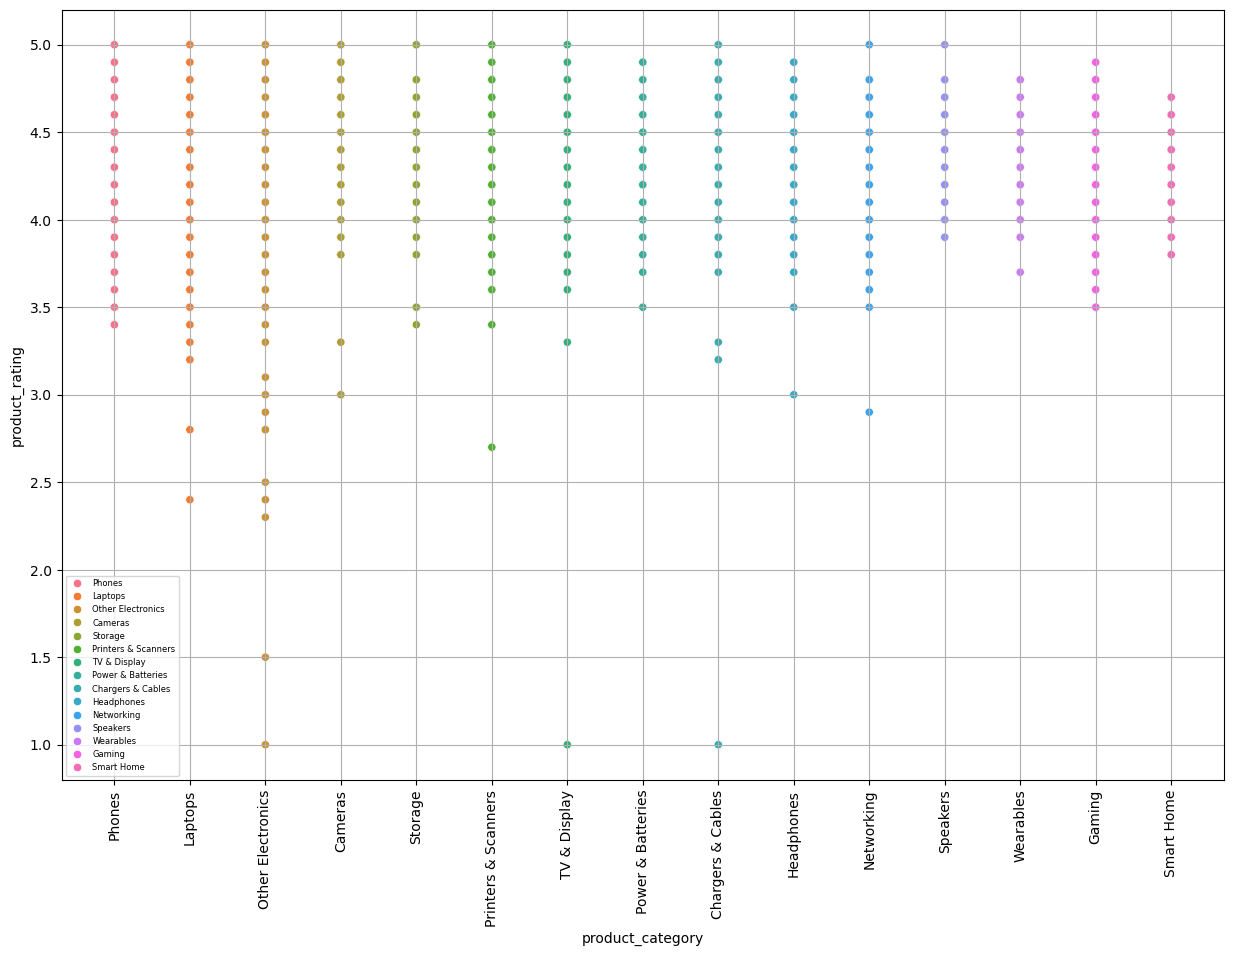

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=amazon_data["product_category"].head(10000), y =amazon_data["product_rating"].head(10000) ,hue = "product_category" ,data = amazon_data)
plt.legend(fontsize = 6)
plt.grid()
plt.xticks(rotation =90)
plt.show()

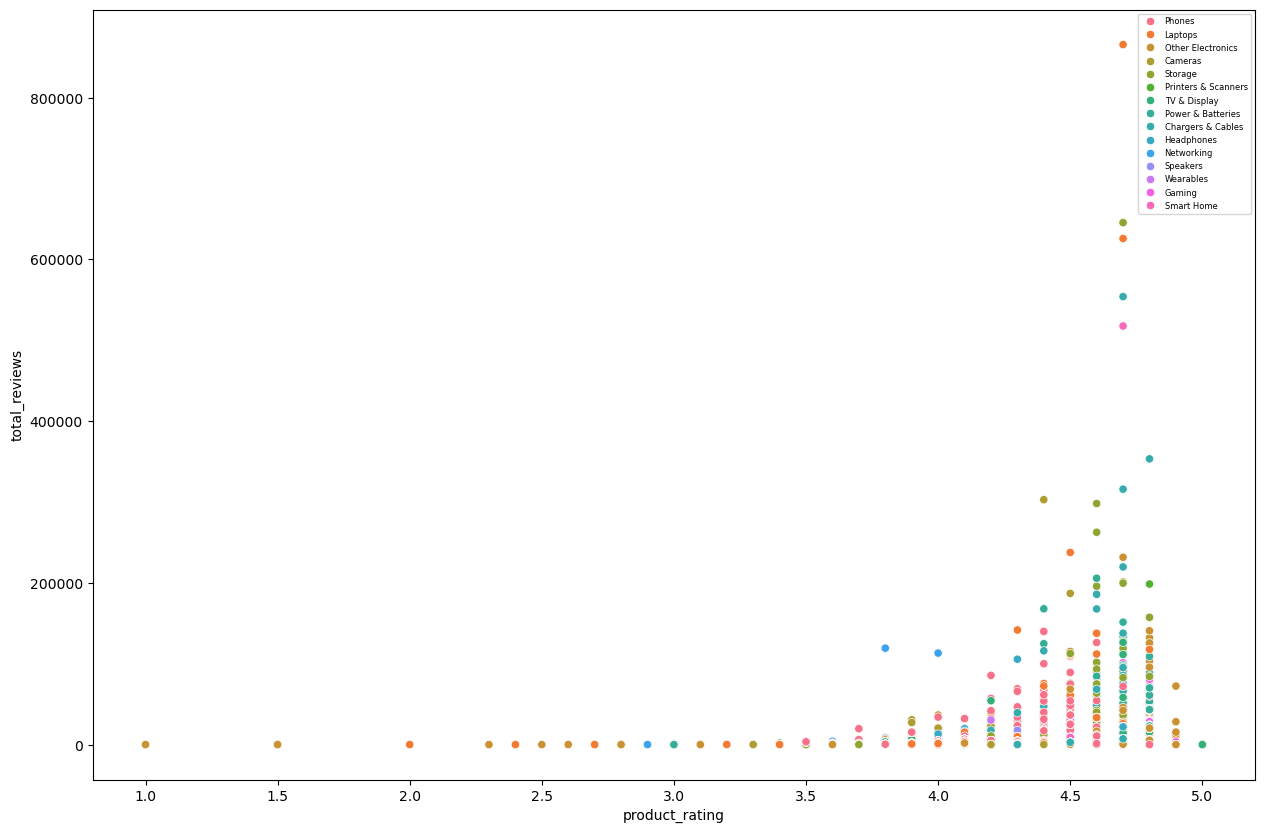

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x= "product_rating" , y = "total_reviews" , data= amazon_data , hue ="product_category")
plt.legend(fontsize= 6)

plt.show()

SALES AND PURCHASE TRENDS ------------>

In [25]:
groupby_data = amazon_data.groupby("product_category")["purchased_last_month"].sum()   #purchase last month 
groupby_data

product_category
Cameras                 3107100.0
Chargers & Cables       1181100.0
Gaming                   505400.0
Headphones               230350.0
Laptops                 4614000.0
Networking               464000.0
Other Electronics       6271150.0
Phones                  4919900.0
Power & Batteries      27009600.0
Printers & Scanners      290300.0
Smart Home               111800.0
Speakers                 610900.0
Storage                 2281950.0
TV & Display            2846300.0
Wearables                787650.0
Name: purchased_last_month, dtype: float64

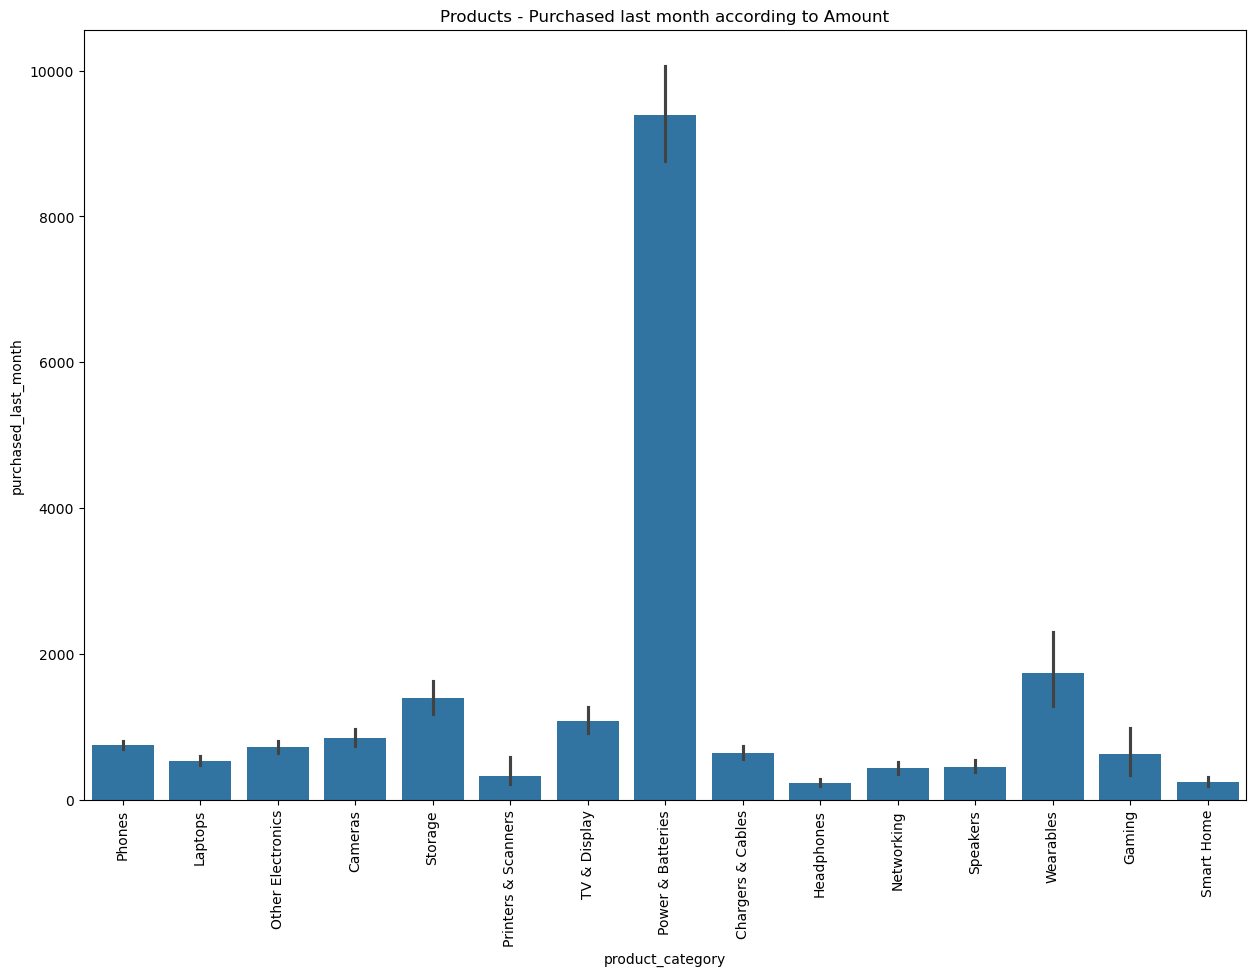

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x= amazon_data["product_category"] , y = amazon_data["purchased_last_month"],data = amazon_data)
plt.title("Products - Purchased last month according to Amount")
plt.xticks(rotation =90)
plt.show()                                           #showing in graph which products are most purchase in last month

In [27]:
product_values = amazon_data["product_category"].value_counts()

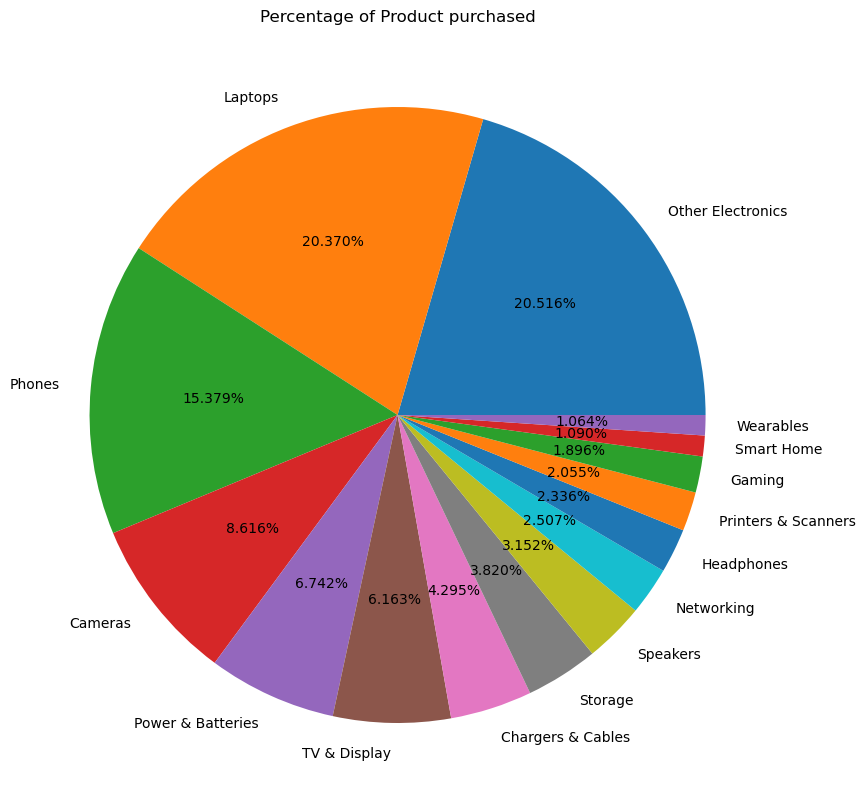

In [28]:
plt.figure(figsize=(15,10))
plt.pie(product_values.values, labels = product_values.index , autopct = '%1.3f%%')
plt.title("Percentage of Product purchased")
plt.show()

PRICING AND  DISCOUNT --------->

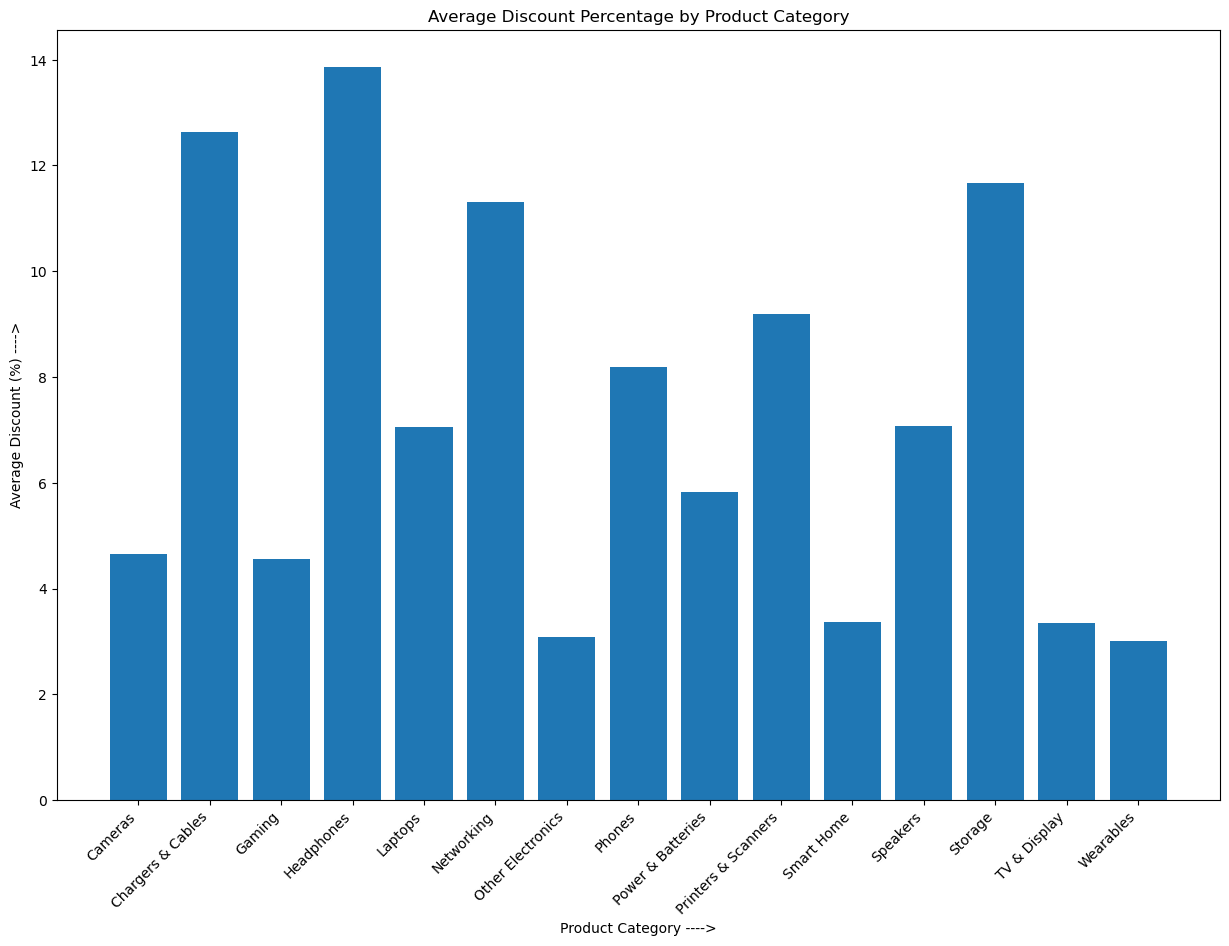

In [29]:
category_discount = amazon_data.groupby("product_category")["discount_percentage"].mean().reset_index()
category_discount
plt.figure(figsize=(15,10))
plt.bar(category_discount["product_category"], category_discount["discount_percentage"])

plt.title("Average Discount Percentage by Product Category")
plt.xlabel("Product Category ---->")
plt.ylabel("Average Discount (%) ---->")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.show()

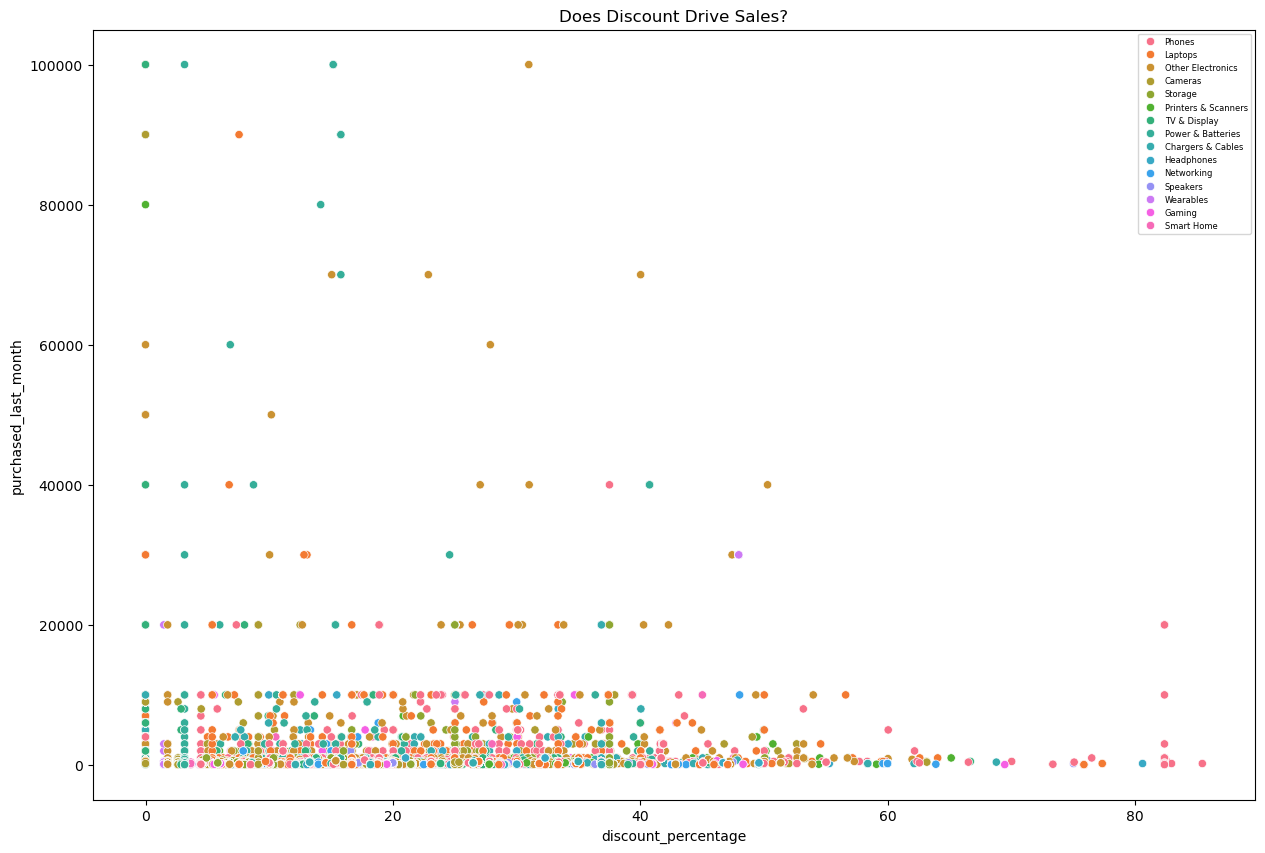

In [30]:
plt.figure(figsize= (15,10))
sns.scatterplot(x= "discount_percentage" , y = "purchased_last_month" , data =amazon_data , hue = "product_category")
plt.legend(fontsize = 6)
plt.title("Does Discount Drive Sales?")
plt.show()

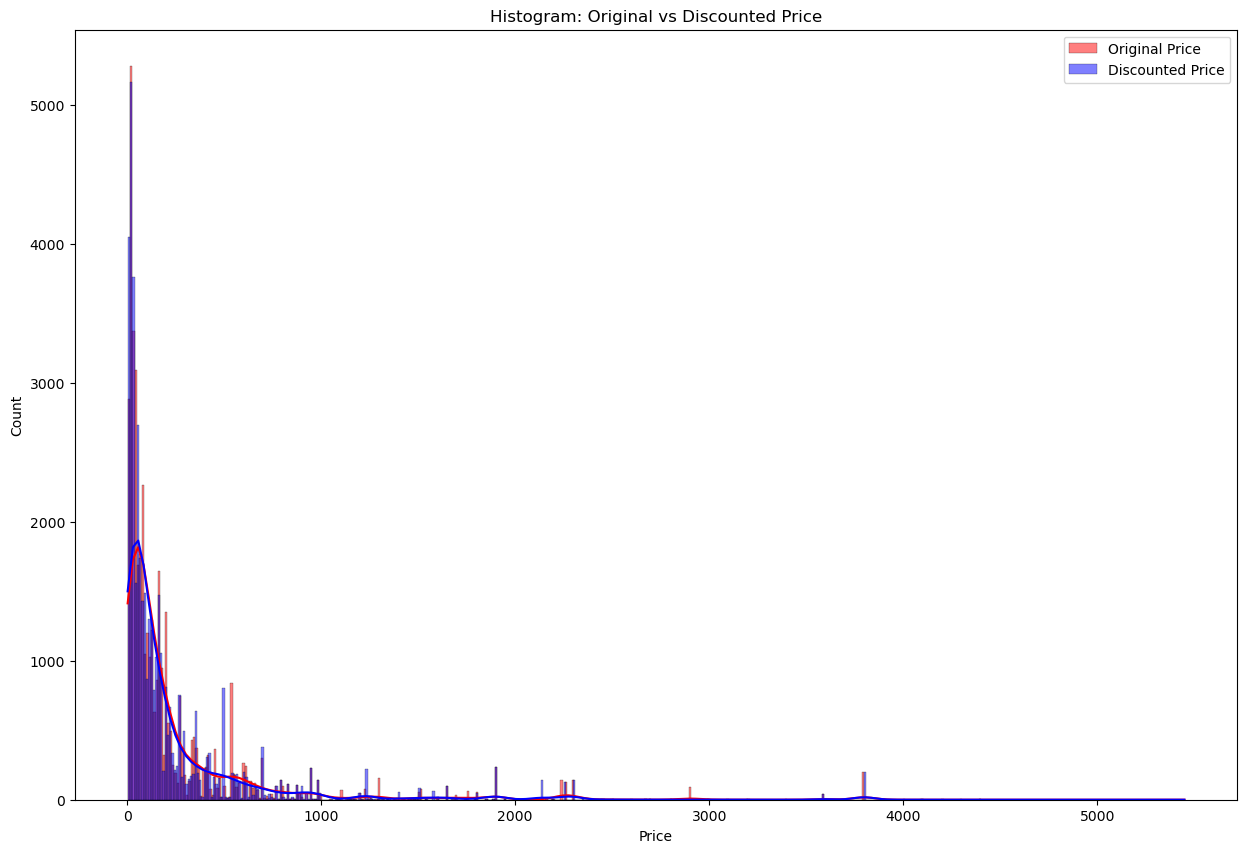

In [31]:
plt.figure(figsize=(15,10))
sns.histplot(amazon_data["original_price"], color="red", label="Original Price", kde=True, alpha=0.5)
sns.histplot(amazon_data["discounted_price"], color="blue", label="Discounted Price", kde=True, alpha=0.5)

plt.title("Histogram: Original vs Discounted Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.show()


In [32]:
grouped = amazon_data.groupby(["product_category", "is_best_seller"])["purchased_last_month"].mean().reset_index()

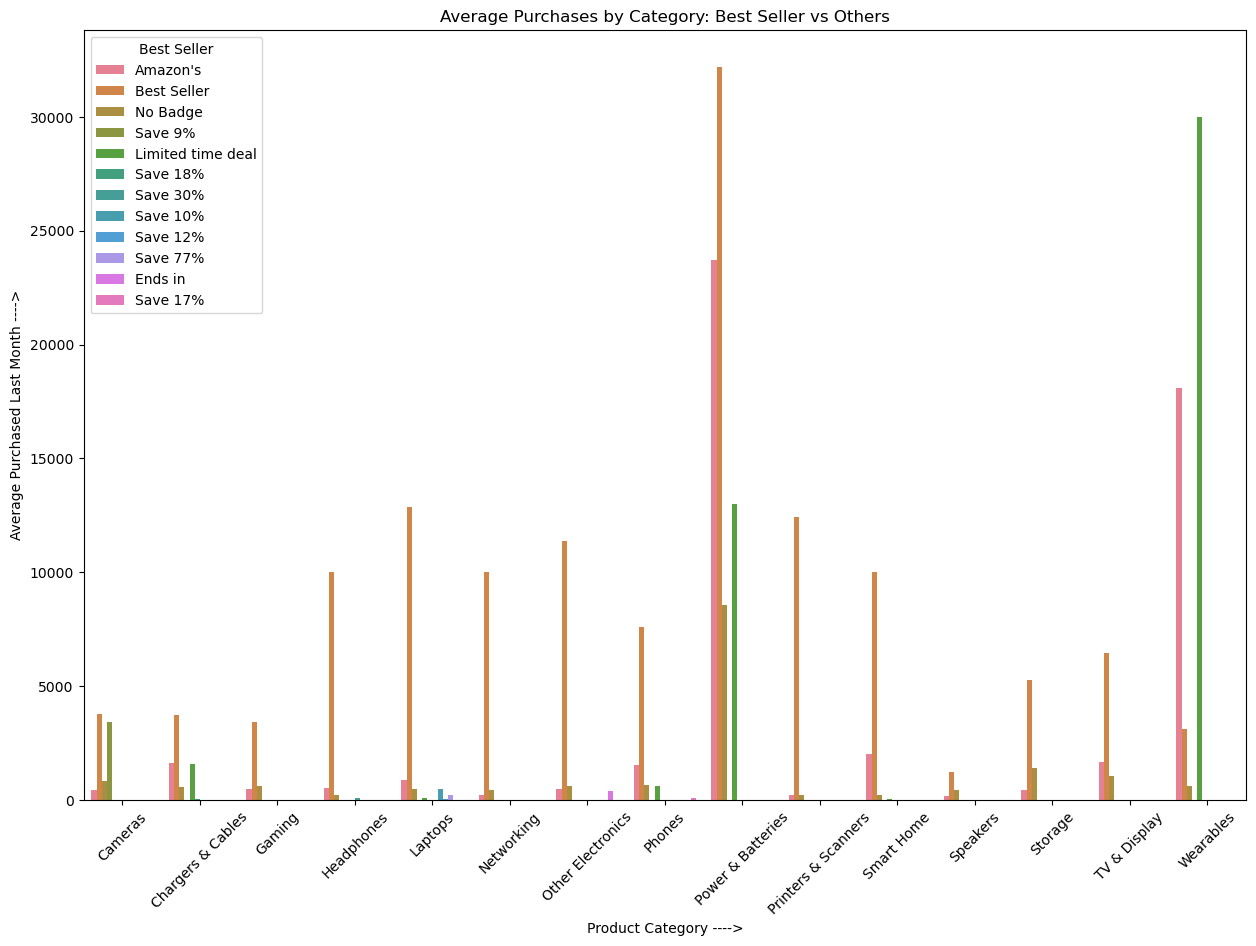

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x="product_category", y="purchased_last_month", hue="is_best_seller", data=grouped)

plt.title("Average Purchases by Category: Best Seller vs Others")
plt.xlabel("Product Category ---->")
plt.ylabel("Average Purchased Last Month ---->")
plt.xticks(rotation=45)
plt.legend(title="Best Seller")
plt.show()


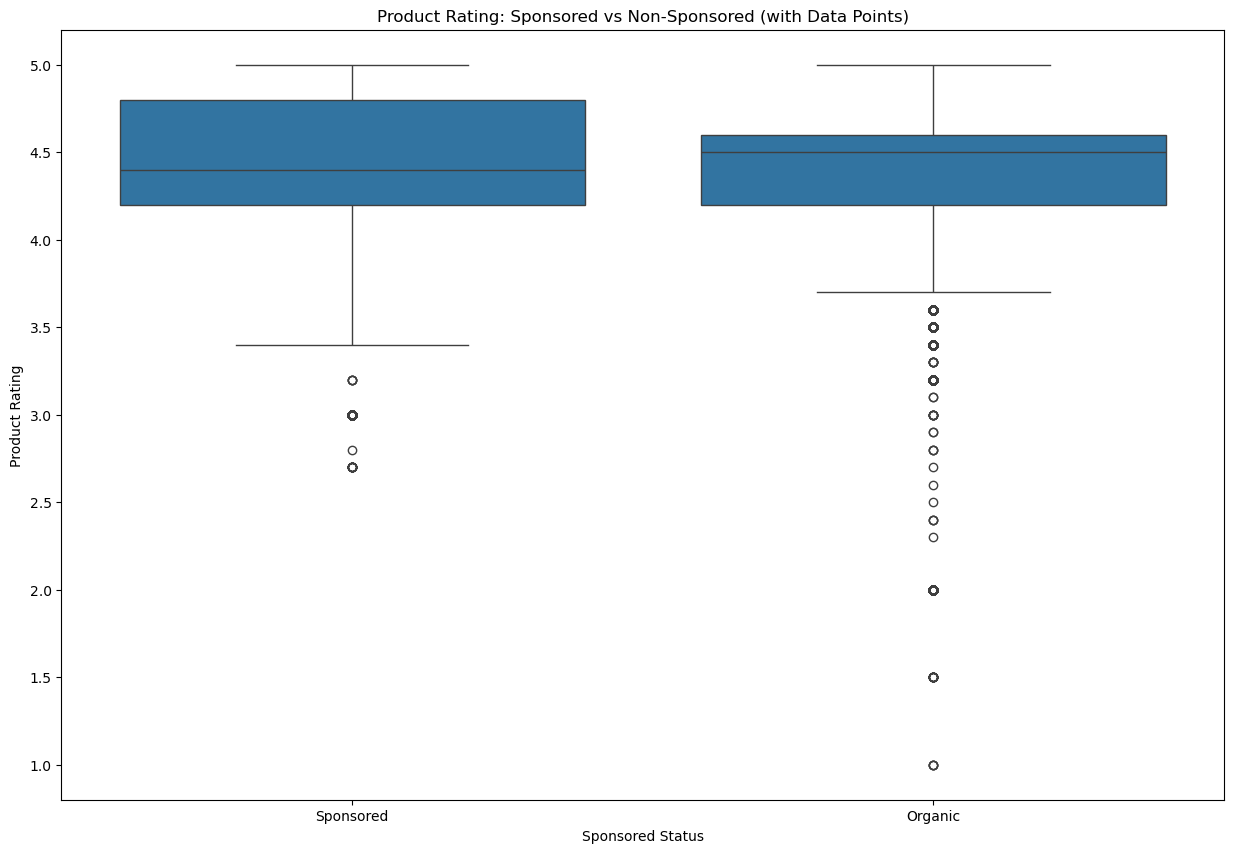

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(x="is_sponsored", y="product_rating", data=amazon_data)

plt.title("Product Rating: Sponsored vs Non-Sponsored (with Data Points)")
plt.xlabel("Sponsored Status")
plt.ylabel("Product Rating")
plt.show()


In [35]:
# Group by coupon status and rating, then calculate average purchases
heatmap_data = amazon_data.groupby(["has_coupon", "product_rating"])["purchased_last_month"].mean().reset_index()
heatmap_data

,has_coupon,product_rating,purchased_last_month
0,No Coupon,1.000000,300.000000
1,No Coupon,1.500000,50.000000
2,No Coupon,2.000000,50.000000
3,No Coupon,2.300000,50.000000
4,No Coupon,2.400000,133.333333
...,...,...,...
128,Save 50% with coupon,4.399431,1187.603306
129,Save 50% with coupon,5.000000,100.000000
130,Save 6% with coupon,4.600000,8000.000000
131,Save 7% with coupon,4.300000,6000.000000


In [36]:
heatmap_pivot = heatmap_data.pivot(index="product_rating", columns="has_coupon", values="purchased_last_month")


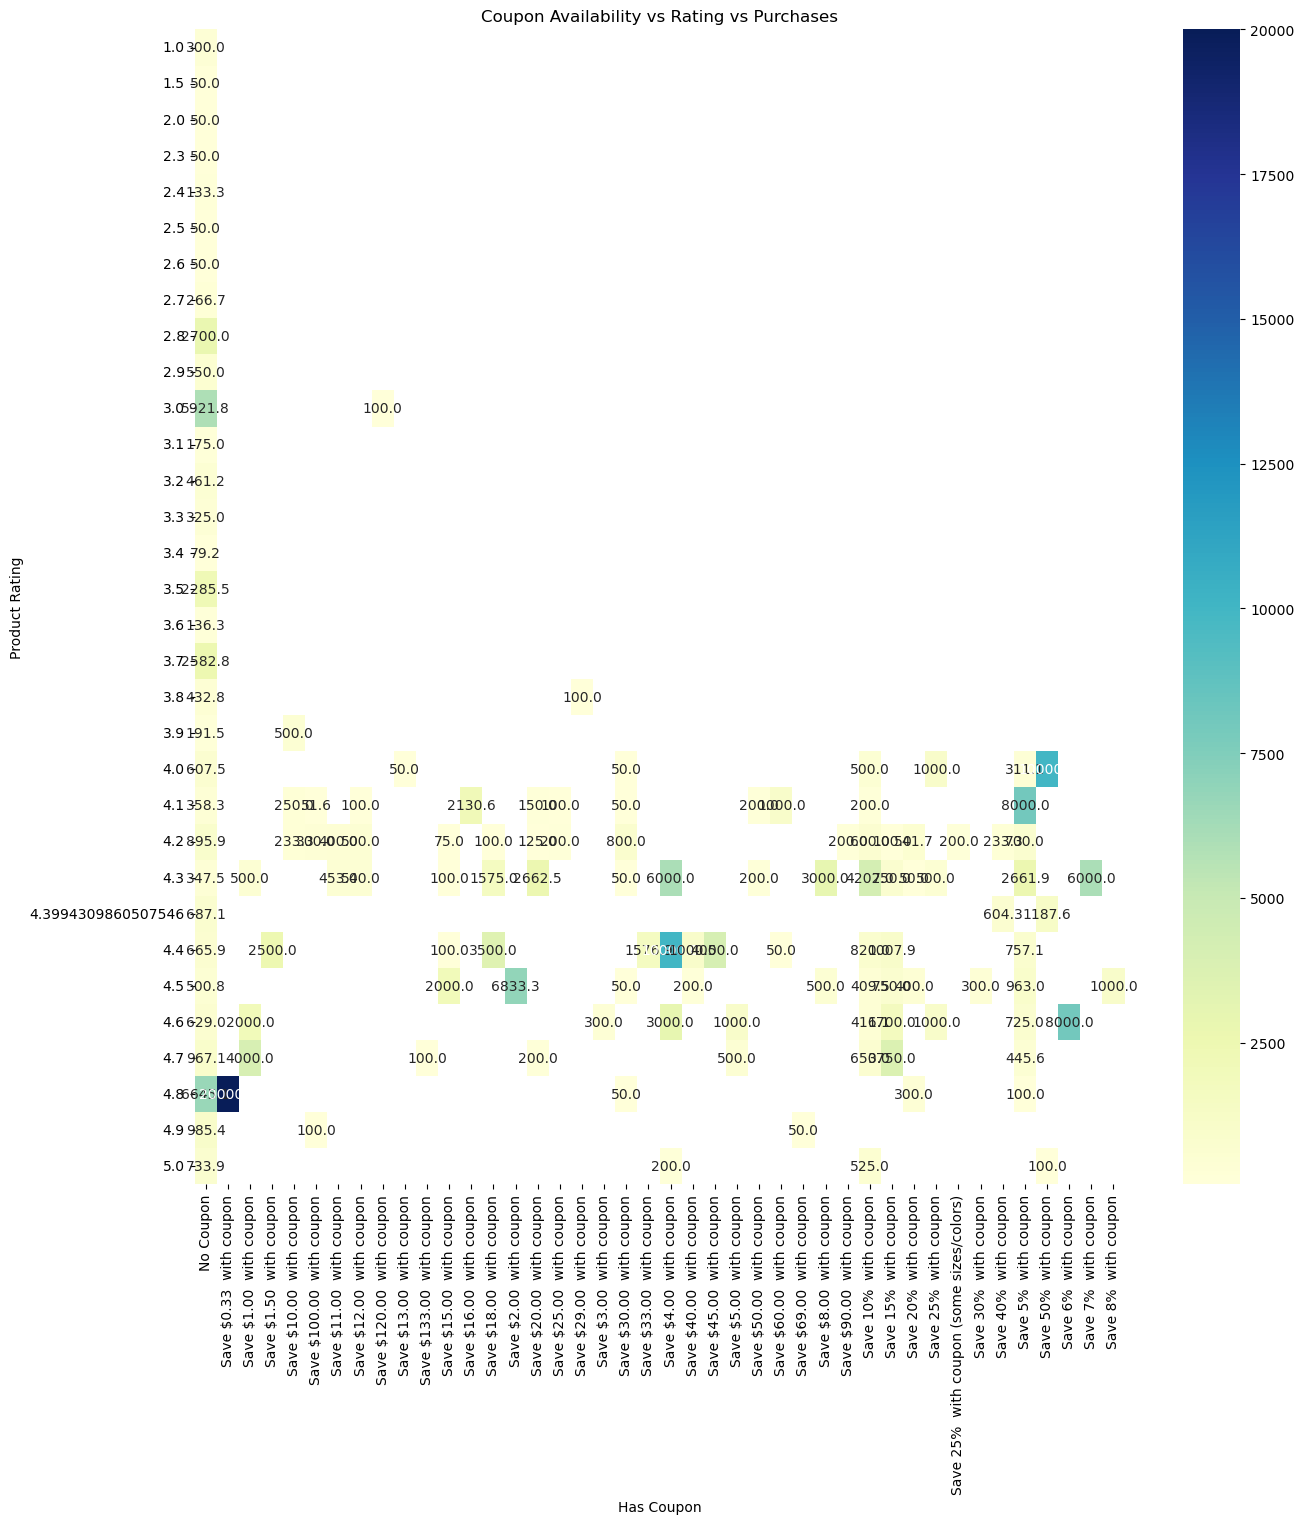

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap="YlGnBu")

plt.title("Coupon Availability vs Rating vs Purchases")
plt.xlabel("Has Coupon")
plt.ylabel("Product Rating")
plt.show()


DELIVERY & AVIALABILITY ----->

In [38]:
avg_purchase_DDate= amazon_data.groupby("delivery_date")["purchased_last_month"].mean().reset_index()

In [39]:
avg_purchase_DDate

,delivery_date,purchased_last_month
0,2025-08-27,833.333333
1,2025-08-28,853.879310
2,2025-08-29,13018.750000
3,2025-08-30,50.000000
4,2025-08-31,1000.000000
5,2025-09-01,2170.271550
6,2025-09-02,1066.495148
7,2025-09-03,934.431081
8,2025-09-04,1127.989418
9,2025-09-05,1460.889111


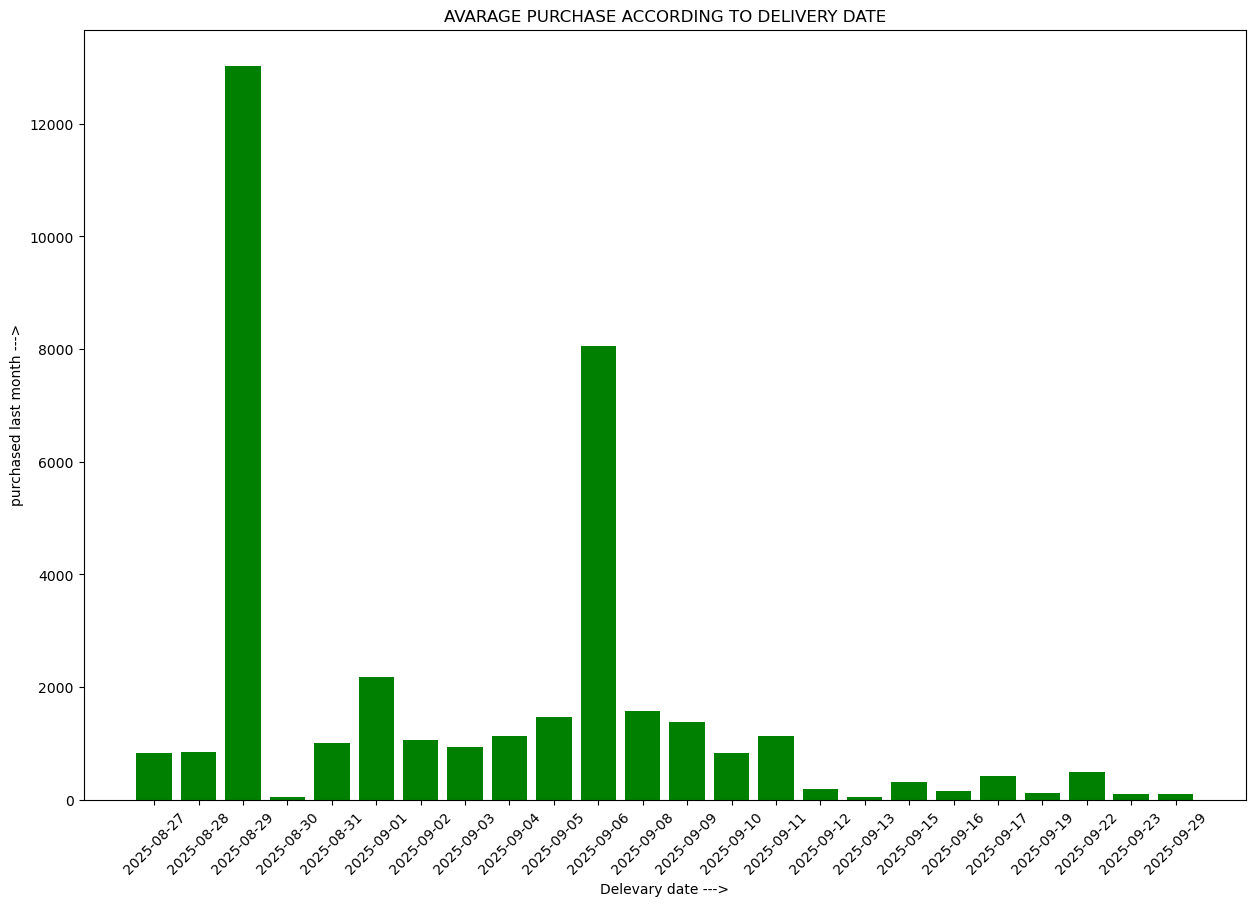

In [40]:
plt.figure(figsize= (15,10))
plt.bar(avg_purchase_DDate["delivery_date"] ,avg_purchase_DDate["purchased_last_month"] , color = "green")
plt.xlabel("Delevary date --->")
plt.ylabel("purchased last month --->")
plt.title("AVARAGE PURCHASE ACCORDING TO DELIVERY DATE")
plt.xticks(rotation = 45)

plt.show()

In [41]:
avg_OrPri_avg_DiPri = amazon_data.groupby("product_category").agg({
    "original_price": "mean",
    "discounted_price": "mean"
}).reset_index()

In [42]:
avg_OrPri_avg_DiPri

,product_category,original_price,discounted_price
0,Cameras,455.627137,443.657283
1,Chargers & Cables,139.736066,125.688383
2,Gaming,173.562368,163.937785
3,Headphones,151.901970,136.766121
4,Laptops,535.447078,494.957625
5,Networking,255.064105,217.749876
6,Other Electronics,147.726114,145.080516
7,Phones,166.485239,159.037041
8,Power & Batteries,55.251157,53.507132
9,Printers & Scanners,169.480057,158.178505


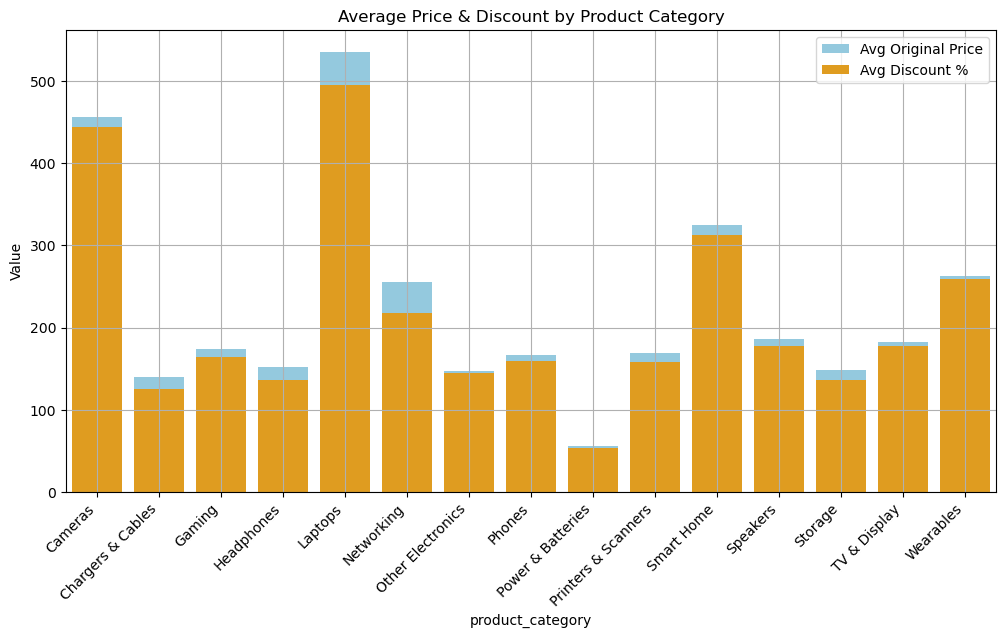

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x="product_category", y="original_price", data=avg_OrPri_avg_DiPri, color="skyblue", label="Avg Original Price")
sns.barplot(x="product_category", y="discounted_price", data= avg_OrPri_avg_DiPri, color="orange", label="Avg Discount %")

plt.xticks(rotation=45, ha="right")
plt.title("Average Price & Discount by Product Category")
plt.grid()
plt.ylabel("Value")
plt.legend()
plt.show()


TOP 5 PRODUCT WHICH ARE MOST SOLD IN LAST MONTH

In [44]:
# Group categories and calculate total sales
category_sales = amazon_data.groupby("product_category")["purchased_last_month"].sum().reset_index()

# Sort in descending order
category_sales = category_sales.sort_values(by="purchased_last_month", ascending=False)

category_sales.head()

,product_category,purchased_last_month
8,Power & Batteries,27009600.0
6,Other Electronics,6271150.0
7,Phones,4919900.0
4,Laptops,4614000.0
0,Cameras,3107100.0


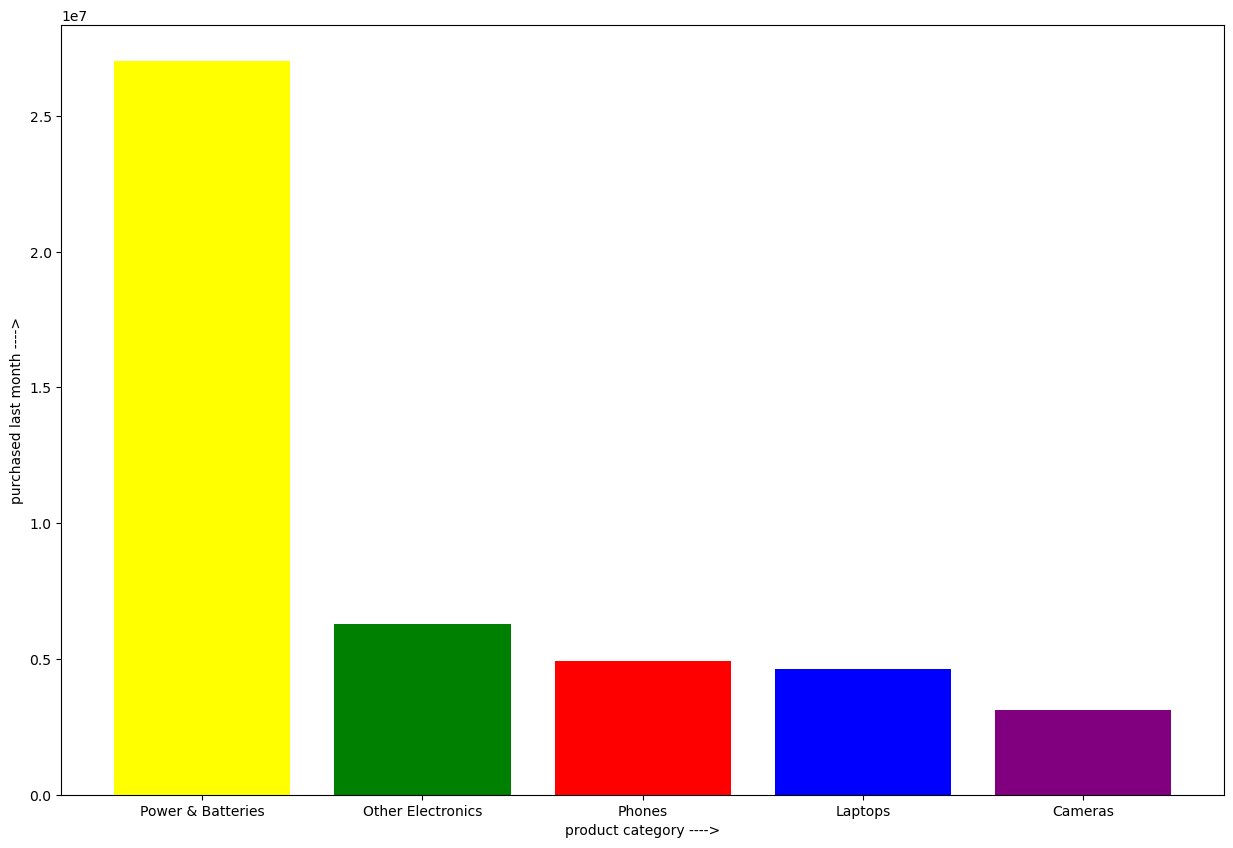

In [45]:
plt.figure(figsize=(15,10))
plt.bar(category_sales["product_category"].head(5) , 
        category_sales["purchased_last_month"].head(5)  , 
        color = ["yellow","green" ,"red" ,"blue", "purple"])
plt.xlabel("product category ---->")
plt.ylabel("purchased last month ---->")
plt.show()